## DBSCAN clustering

[]

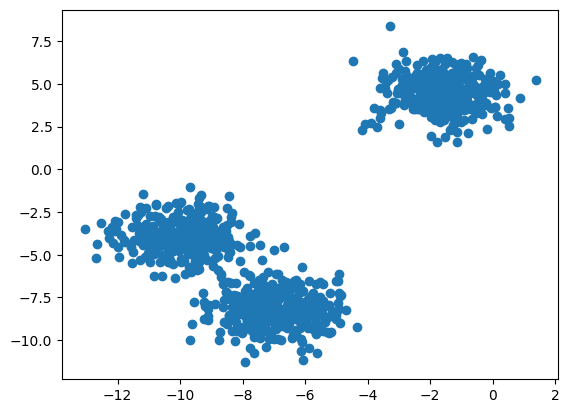

In [124]:
import sklearn.datasets as data
import matplotlib.pyplot as plt

samples = 1000
X, clusters = data.make_blobs(n_samples=samples, n_features=2, cluster_std=1.0, random_state=1)
plt.scatter(X[:,0], X[:,1])
plt.plot()

In [125]:
import sklearn.cluster as cluster
import numpy as np

db = cluster.DBSCAN(eps = 0.5, min_samples = 1)

db.fit(X)

DBSCAN(min_samples=1)

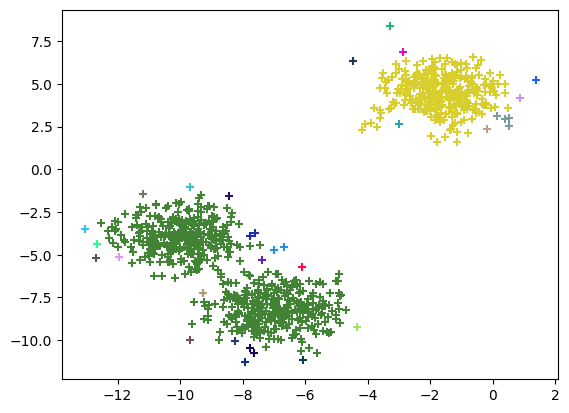

In [126]:
from scripts.clustering_plotting import plot_cluster

colors = []
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
k = len(set(labels)) - (1 if -1 in labels else 0)
for i in range(0, k):
    colors.append(np.random.rand(3,1).flatten())
    
plot_cluster(db.labels_, colors, X, k)

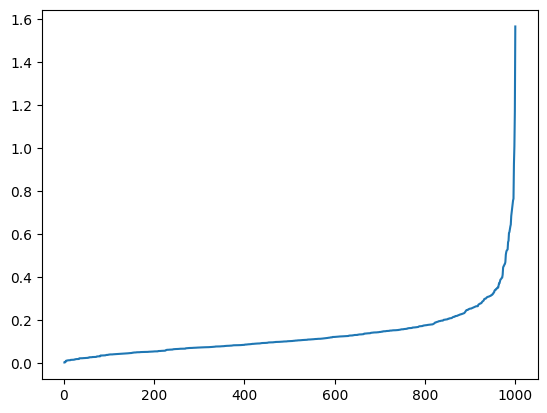

In [127]:
import sklearn.neighbors as neighbors
import numpy as np

n_neighbors = samples


dist_list = []
nn = neighbors.NearestNeighbors(n_neighbors = 2, metric = 'euclidean')

nn.fit(X)
dist_list, ind = nn.kneighbors(X, n_neighbors = 2)

x_list = np.linspace(1, samples, samples).astype('int').tolist()
plt.plot(x_list, np.sort(dist_list[:, 1]))

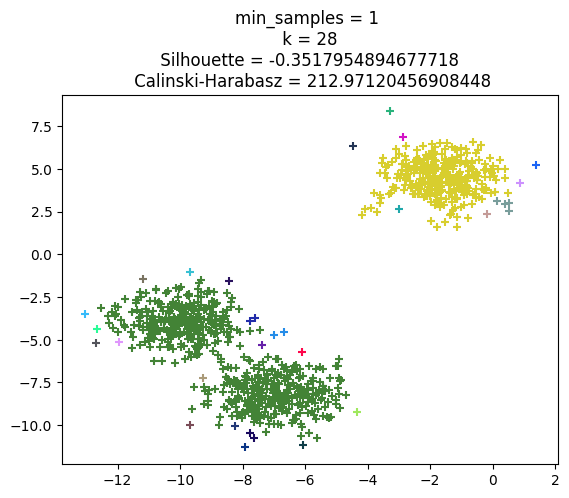

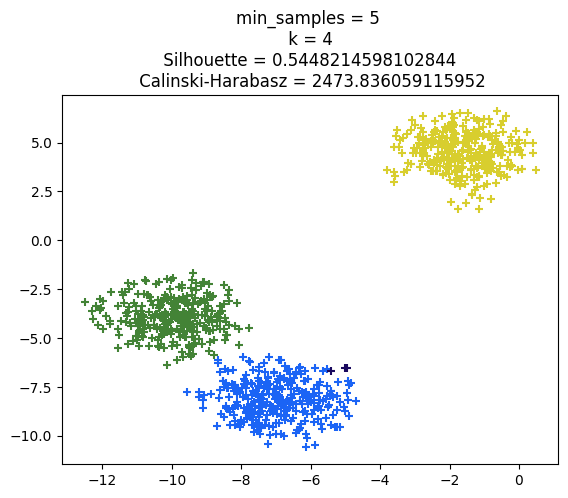

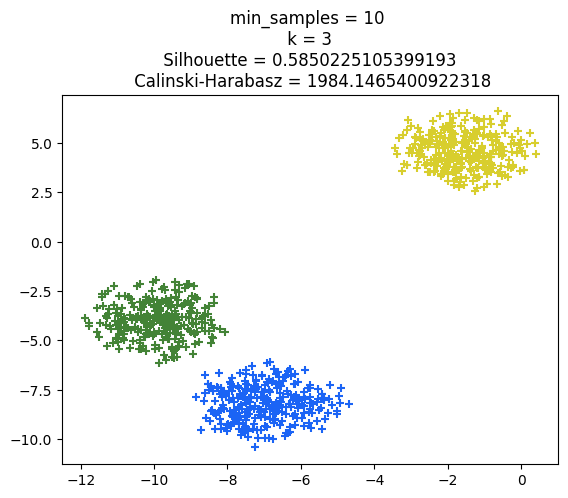

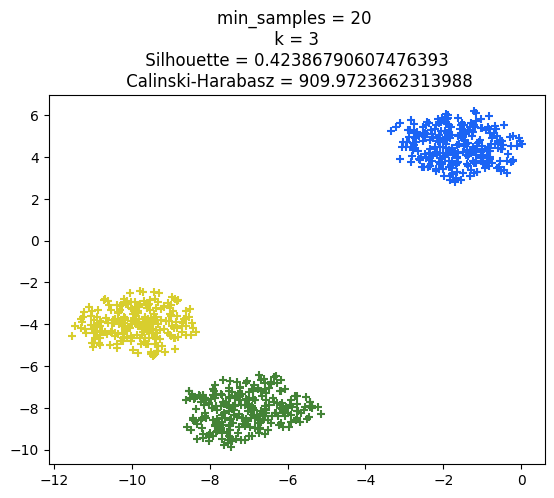

In [128]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics


min_samples_list = [1, 5, 10, 20]

for min_samples in min_samples_list:
    db = cluster.DBSCAN(eps = 0.5, min_samples = min_samples)

    db.fit(X)
    labels = db.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    plot_cluster(db.labels_, colors, X, k)
    SC = metrics.silhouette_score(X, db.labels_, metric = 'euclidean')
    CH = metrics.calinski_harabasz_score(X, db.labels_)
    plt.title(f'min_samples = {min_samples} \n k = {k} \n Silhouette = {SC} \n Calinski-Harabasz = {CH}')
    plt.plot()
    plt.show()